# Synthetic Data Comparison

In this notebook, different ways to compare the quality of augmented time series are explored.

## 0 Imports and static variables

In [75]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch

# own classes
from utilities import load_sequential_time_series, reconstruct_sequential_data, load_complete_time_series, slice_years, train_test_split, extract_features_and_targets, split_data_into_sequences, Scaler

In [76]:
DATA_FOLDER = Path("./data")
SYNTHETIC_DATA_FOLDER = DATA_FOLDER / "synthetic"
REAL_DATA_FOLDER = DATA_FOLDER / "real"

In [77]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## 1 Loading data

In [78]:
aapl_time_gan = load_sequential_time_series(SYNTHETIC_DATA_FOLDER / "AAPL_complete_TimeGAN_10953_25_6_lstm_1.csv", (10953, 25, 6))

In [79]:
aapl_real = load_complete_time_series(REAL_DATA_FOLDER / "AAPL_complete.csv")

In [80]:
aapl_real_no_date = aapl_real.drop(columns=["Date"])
aapl_real_numpy = aapl_real_no_date.to_numpy()

In [87]:
aapl_split = split_data_into_sequences(aapl_real_numpy, 25)

Shape of the data after splitting into sequences: (10954, 25, 6)


In [88]:
aapl_split[0]

array([[1.283480e-01, 1.283480e-01, 1.289060e-01, 1.283480e-01,
        9.905800e-02, 4.690336e+08],
       [1.216520e-01, 1.222100e-01, 1.222100e-01, 1.216520e-01,
        9.389000e-02, 1.758848e+08],
       [1.127230e-01, 1.132810e-01, 1.132810e-01, 1.127230e-01,
        8.699900e-02, 1.057280e+08],
       [1.155130e-01, 1.155130e-01, 1.160710e-01, 1.155130e-01,
        8.915200e-02, 8.644160e+07],
       [1.188620e-01, 1.188620e-01, 1.194200e-01, 1.188620e-01,
        9.173700e-02, 7.344960e+07],
       [1.261160e-01, 1.261160e-01, 1.266740e-01, 1.261160e-01,
        9.733500e-02, 4.863040e+07],
       [1.322540e-01, 1.322540e-01, 1.328130e-01, 1.322540e-01,
        1.020720e-01, 3.736320e+07],
       [1.378350e-01, 1.378350e-01, 1.383930e-01, 1.378350e-01,
        1.063800e-01, 4.695040e+07],
       [1.450890e-01, 1.450890e-01, 1.456470e-01, 1.450890e-01,
        1.119780e-01, 4.800320e+07],
       [1.584820e-01, 1.584820e-01, 1.590400e-01, 1.584820e-01,
        1.223150e-01, 5.557

In [89]:
np.random.shuffle(aapl_split)

In [91]:
aapl_split[500]

array([[9.2271430e+00, 9.4007140e+00, 9.4642860e+00, 9.1571430e+00,
        7.8011130e+00, 5.9971240e+08],
       [9.0650000e+00, 9.1128570e+00, 9.1600000e+00, 8.9107140e+00,
        7.6640290e+00, 7.5936280e+08],
       [9.0792860e+00, 9.0964290e+00, 9.1492860e+00, 8.8467860e+00,
        7.6761060e+00, 7.6283480e+08],
       [9.0128570e+00, 9.1778570e+00, 9.2339290e+00, 8.9378570e+00,
        7.6199460e+00, 7.8267840e+08],
       [8.8692860e+00, 8.9107140e+00, 9.0328570e+00, 8.7446430e+00,
        7.4985630e+00, 1.0257268e+09],
       [8.4914290e+00, 8.6385710e+00, 8.7089290e+00, 8.4360710e+00,
        7.1791010e+00, 1.2829152e+09],
       [8.6542860e+00, 8.3150000e+00, 8.7321430e+00, 8.2625000e+00,
        7.3167900e+00, 1.2238912e+09],
       [8.8128570e+00, 8.8314290e+00, 8.9607140e+00, 8.7950000e+00,
        7.4508530e+00, 7.5423880e+08],
       [8.7578570e+00, 8.5482140e+00, 8.8128570e+00, 8.4700000e+00,
        7.4043560e+00, 1.0480064e+09],
       [8.7182140e+00, 8.9314290e+00,

## 2 Plot Data

In [ ]:
aapl_time_gan.shape

(10953, 25, 6)

In [ ]:
aapl_time_gan = reconstruct_sequential_data(aapl_time_gan)

In [ ]:
aapl_time_gan = pd.DataFrame(aapl_time_gan, columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
aapl_time_gan['Date'] = aapl_real['Date']

In [ ]:
aapl_time_gan.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.597978,0.598048,0.604765,0.590366,0.588804,0.013535,1980-12-12
1,0.003094,0.002917,0.002677,0.002949,0.002666,0.009985,1980-12-15
2,0.001737,0.001835,0.001789,0.001802,0.001625,0.107289,1980-12-16
3,0.001638,0.001562,0.001408,0.001584,0.001429,0.009956,1980-12-17
4,0.001634,0.001559,0.001402,0.001577,0.001422,0.011036,1980-12-18


In [ ]:
aapl_time_gan.describe()

,Open,High,Low,Close,Adj Close,Volume,Date
count,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953
mean,0.092252,0.092295,0.093035,0.091288,0.089738,0.046184,2002-08-24 22:51:30.221857024
min,0.000698,0.000678,0.000621,0.000687,0.000620,0.005753,1980-12-12 00:00:00
25%,0.001502,0.001513,0.001396,0.001509,0.001363,0.010105,1991-10-11 00:00:00
50%,0.002018,0.002011,0.001902,0.002006,0.001808,0.013587,2002-08-21 00:00:00
75%,0.020921,0.021102,0.021288,0.020478,0.017346,0.099412,2013-07-09 00:00:00
max,0.598507,0.598472,0.605154,0.591027,0.589274,0.128278,2024-05-23 00:00:00
std,0.195856,0.195909,0.198048,0.193527,0.192704,0.045460,NaN


In [ ]:
aapl_time_gan.shape

(10953, 7)

In [ ]:
aapl_time_gan = slice_years(aapl_time_gan, ['2020', '2020'])

In [ ]:
aapl_time_gan.shape

(253, 7)

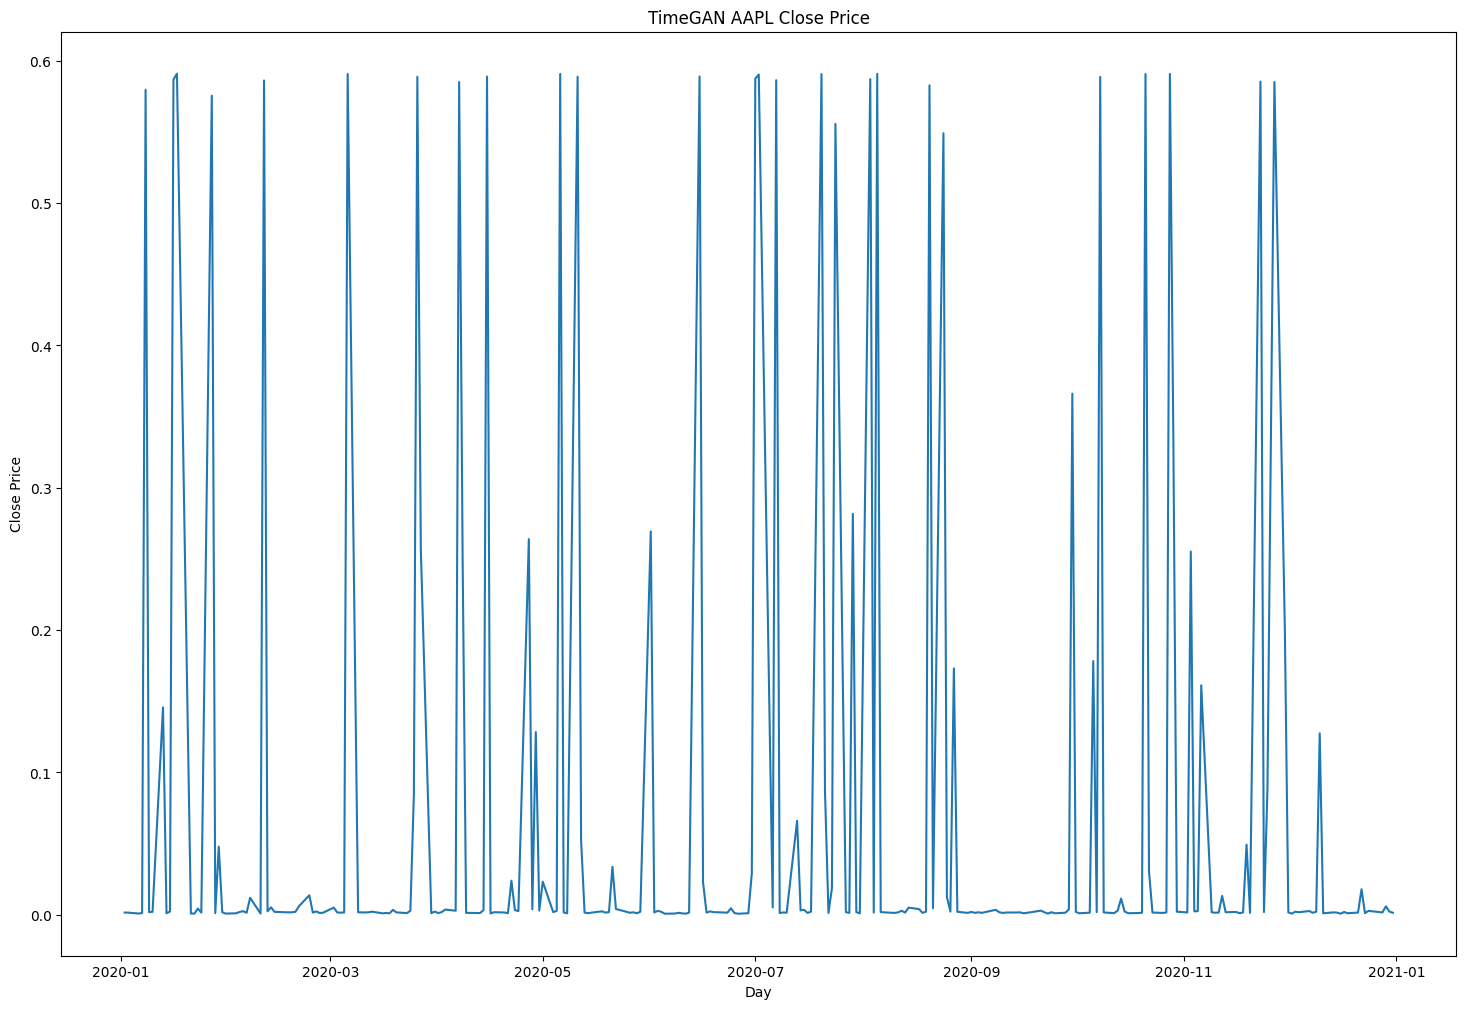

In [ ]:
plt.figure(figsize=(18, 12))
plt.plot(aapl_time_gan['Date'], aapl_time_gan["Close"], label="Close")
plt.title("TimeGAN AAPL Close Price")
plt.xlabel("Day")
plt.ylabel("Close Price")
plt.show()

In [ ]:
plot_time_series_attribute(df=aapl, title="AAPL")

NameError: name 'plot_time_series_attribute' is not defined

In [ ]:
# get only data between 2020-2024
aapl_22_23 = slice_years(df=aapl, years=["2022", "2023"])

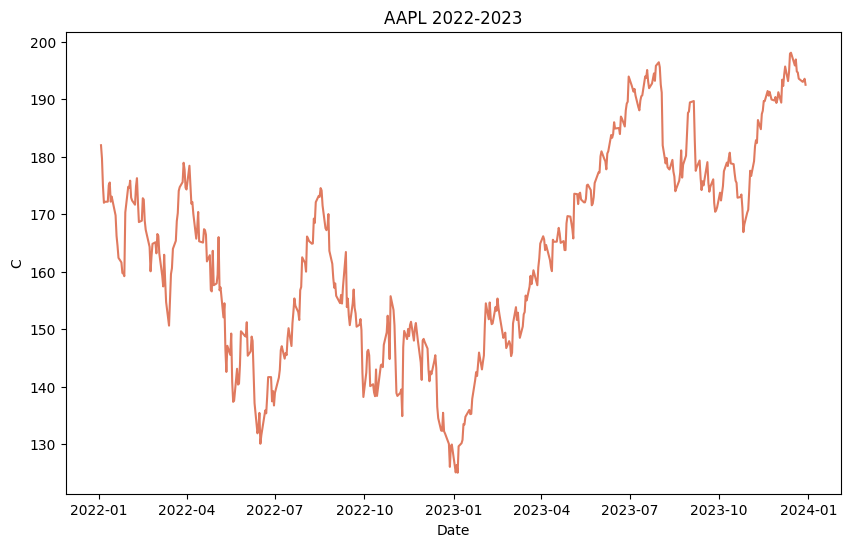

In [ ]:
plot_time_series_attribute(aapl_22_23, "AAPL 2022-2023")

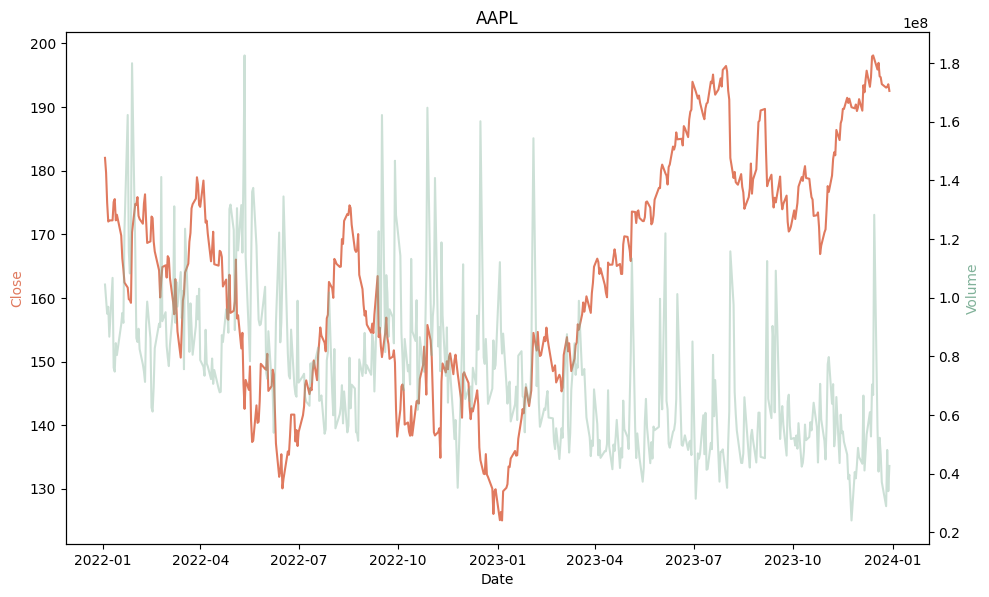

In [ ]:
plot_multiple_time_series_attributes(aapl_22_23, "AAPL")

## 3 Brownian Motion

In [ ]:
aapl_syn = brownian_motion(aapl_22_23, ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
aapl_syn.head()

Augmenting the following columns with brownian motion: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']...


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481094,1.044879e+08
1,2022-01-04,172.620023,180.388536,176.211397,193.085058,172.600136,0.000000e+00
2,2022-01-05,167.867580,176.796036,179.046459,196.184902,188.092348,4.537602e+14
3,2022-01-06,171.495009,174.516889,179.089305,187.578594,195.036392,9.066193e+14
4,2022-01-07,173.196107,177.556243,175.616598,191.393298,191.480458,1.432839e+15


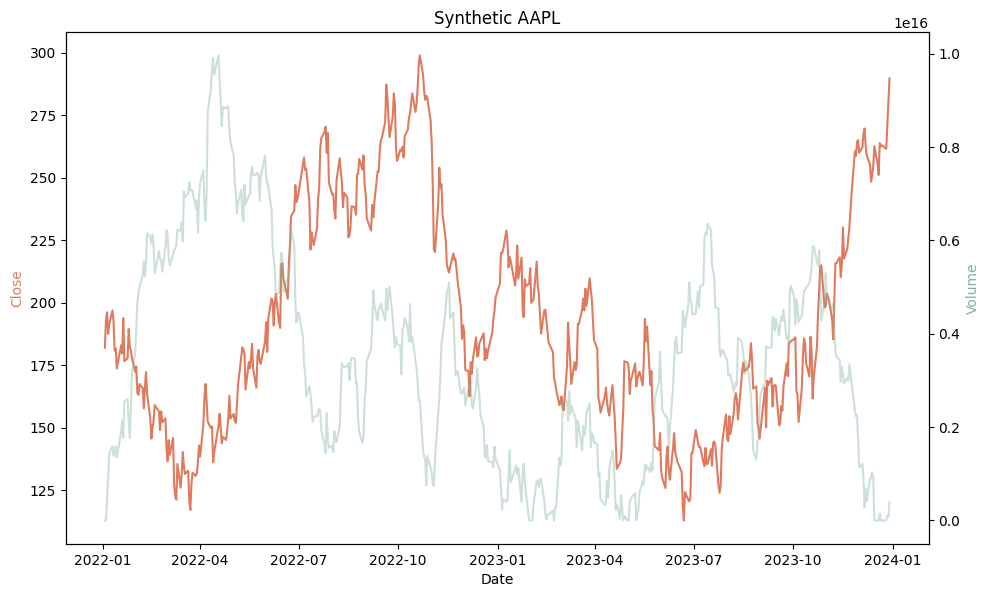

In [ ]:
plot_multiple_time_series_attributes(aapl_syn, title="Synthetic AAPL")

In [ ]:
aapl_syn.to_csv(SYNTHETIC_DATA_FOLDER / 'AAPL_22_23_syn.csv', index=False)

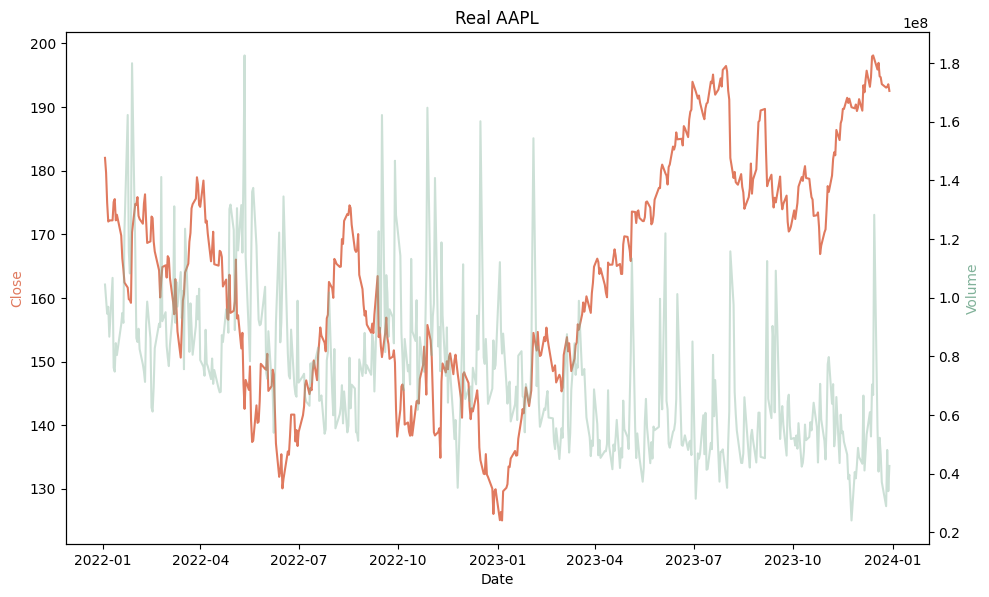

In [ ]:
plot_multiple_time_series_attributes(aapl_22_23, title="Real AAPL")

## MAE and MSE Loss experiments

In [ ]:
# real = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# A = np.array([1, 2, 3, 4, 5, 6, 8, 9, 10, 12])
# B = np.array([1, 2.1, 3.1, 4.1, 5.1, 6, 7, 8, 9, 10])

# # scale
# scaler = MinMaxScaler(feature_range=(0, 1))
# real_scaled = scaler.fit_transform(real.reshape(-1, 1))
# A_scaled = scaler.fit_transform(A.reshape(-1, 1))
# B_scaled = scaler.fit_transform(B.reshape(-1, 1))

# loss_MSE = torch.nn.MSELoss()
# loss_MAE = torch.nn.L1Loss()

# MSE_A = loss_MSE(torch.tensor(real_scaled, dtype=torch.float32), torch.tensor(A_scaled, dtype=torch.float32))
# MAE_A = loss_MAE(torch.tensor(real, dtype=torch.float32), torch.tensor(A, dtype=torch.float32))
# MSE_B = loss_MSE(torch.tensor(real_scaled, dtype=torch.float32), torch.tensor(B_scaled, dtype=torch.float32))
# MAE_B = loss_MAE(torch.tensor(real, dtype=torch.float32), torch.tensor(B, dtype=torch.float32))

# print(f'MSE_A: {MSE_A}\n')
# print(f'MAE_A: {MAE_A}\n')
# print(f'MSE_B: {MSE_B}\n')
# print(f'MAE_B: {MAE_B}\n')

MSE_A: 0.0030915215611457825

MAE_A: 0.5

MSE_B: 4.9382710130885243e-05

MAE_B: 0.039999961853027344

